In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
cd drive/My\ Drive/License Plate Detection

/content/drive/My Drive/License Plate Detection


# Importing Libraries

In [ ]:
import cv2
from PIL import Image

import json

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

import urllib

# Downloading Dataset and making csv file

In [ ]:
data = pd.read_json('Indian_Number_plates.json',lines=True)
pd.set_option('display.max_colwidth', None)
del data['extras']
data.head()

,content,annotation
0,http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/77d1f81a-bee6-487c-aff2-0efa31a9925c____bd7f7862-d727-11e7-ad30-e18a56154311.jpg.jpeg,"[{'label': ['number_plate'], 'notes': '', 'points': [{'x': 0.722084367245657, 'y': 0.5879828326180251}, {'x': 0.8684863523573201, 'y': 0.688841201716738}], 'imageWidth': 806, 'imageHeight': 466}]"
1,http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/4eb236a3-6547-4103-b46f-3756d21128a9___06-Sanjay-Dutt.jpg.jpeg,"[{'label': ['number_plate'], 'notes': '', 'points': [{'x': 0.16194331983805602, 'y': 0.850779510022271}, {'x': 0.582995951417004, 'y': 1}], 'imageWidth': 494, 'imageHeight': 449}]"
2,http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/84969111-2ec3-4914-b3bb-da5aaac701e7___1.jpg.jpeg,"[{'label': ['number_plate'], 'notes': '', 'points': [{'x': 0.082, 'y': 0.697452229299363}, {'x': 0.23, 'y': 0.8280254777070061}], 'imageWidth': 500, 'imageHeight': 314}]"
3,http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/52b45060-9645-47c7-882d-b69a5bf07eff___1006372d1351343820-my-new-maruti-swift-zxi-21102012241.jpg.jpeg,"[{'label': ['number_plate'], 'notes': '', 'points': [{'x': 0.434, 'y': 0.667377398720682}, {'x': 0.718, 'y': 0.7654584221748401}], 'imageWidth': 500, 'imageHeight': 469}]"
4,http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/5d08ee4a-d8e7-4fda-8959-21f263f62c25___100923d1368191518-custom-number-plates-embossedplates1.jpg.jpeg,"[{'label': ['number_plate'], 'notes': '', 'points': [{'x': 0.20879120879120802, 'y': 0.39076376554174}, {'x': 0.865134865134865, 'y': 0.9840142095914741}], 'imageWidth': 1001, 'imageHeight': 563}]"


In [ ]:
data['points'] = data.apply(lambda row : row['annotation'][0]['points']  ,axis = 1)
data['height'] = data.apply(lambda row: row['annotation'][0]['imageHeight'], axis=1)
data['width'] = data.apply(lambda row: row['annotation'][0]['imageWidth'], axis=1)

del data['annotation']
data.head()

,content,points,height,width
0,http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/77d1f81a-bee6-487c-aff2-0efa31a9925c____bd7f7862-d727-11e7-ad30-e18a56154311.jpg.jpeg,"[{'x': 0.722084367245657, 'y': 0.5879828326180251}, {'x': 0.8684863523573201, 'y': 0.688841201716738}]",466,806
1,http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/4eb236a3-6547-4103-b46f-3756d21128a9___06-Sanjay-Dutt.jpg.jpeg,"[{'x': 0.16194331983805602, 'y': 0.850779510022271}, {'x': 0.582995951417004, 'y': 1}]",449,494
2,http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/84969111-2ec3-4914-b3bb-da5aaac701e7___1.jpg.jpeg,"[{'x': 0.082, 'y': 0.697452229299363}, {'x': 0.23, 'y': 0.8280254777070061}]",314,500
3,http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/52b45060-9645-47c7-882d-b69a5bf07eff___1006372d1351343820-my-new-maruti-swift-zxi-21102012241.jpg.jpeg,"[{'x': 0.434, 'y': 0.667377398720682}, {'x': 0.718, 'y': 0.7654584221748401}]",469,500
4,http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/5d08ee4a-d8e7-4fda-8959-21f263f62c25___100923d1368191518-custom-number-plates-embossedplates1.jpg.jpeg,"[{'x': 0.20879120879120802, 'y': 0.39076376554174}, {'x': 0.865134865134865, 'y': 0.9840142095914741}]",563,1001


In [ ]:
Points = []                 # for later use
vehicles_path = 'DataSet/Vehicles/'
plates_path = 'DataSet/Plates/'

def downloadTraining(df):

    for index, row in df.iterrows():

        # Get the image from the URL
        resp = urllib.request.urlopen(row[0]) 
        im = Image.open(resp)
        if im.mode in ("RGBA", "P"):  
            im = im.convert("RGB")
        im.save(vehicles_path + str(index) + '.jpg') 
        im = np.array(im)
        
        # Points of rectangle
        x_point_top = row[1][0]['x']*im.shape[1]
        y_point_top = row[1][0]['y']*im.shape[0]
        x_point_bot = row[1][1]['x']*im.shape[1]
        y_point_bot = row[1][1]['y']*im.shape[0]
        Points.append([int(x_point_top), int(y_point_top),int(x_point_bot), int(y_point_bot)])
        
        # Cut the plate from the image and use it as output
        im = Image.fromarray(im)
        plateImage = im.crop((x_point_top, y_point_top, x_point_bot, y_point_bot))
        plateImage.save(plates_path + str(index) + '.jpg')
downloadTraining(data)

In [ ]:
main_df = pd.DataFrame([row for row in Points], columns = ['xmin','ymin','xmax','ymax'])
main_df.head()

,xmin,ymin,xmax,ymax
0,581,273,700,320
1,79,381,288,449
2,41,219,115,259
3,217,312,359,359
4,208,219,865,553


In [ ]:
give_me_236 = [vehicles_path + str(i) + '.jpg' for i in list(range(0, 237))]
main_df['filename'] = give_me_236
main_df.head()

,xmin,ymin,xmax,ymax,filename
0,581,273,700,320,DataSet/Cars/0.jpg
1,79,381,288,449,DataSet/Cars/1.jpg
2,41,219,115,259,DataSet/Cars/2.jpg
3,217,312,359,359,DataSet/Cars/3.jpg
4,208,219,865,553,DataSet/Cars/4.jpg


In [ ]:
main_df['width'] = main_df['xmax'] - main_df['xmin']
main_df['height'] = main_df['ymax'] - main_df['ymin']

main_df.head()

,xmin,ymin,xmax,ymax,filename,width,height
0,581,273,700,320,DataSet/Cars/0.jpg,119,47
1,79,381,288,449,DataSet/Cars/1.jpg,209,68
2,41,219,115,259,DataSet/Cars/2.jpg,74,40
3,217,312,359,359,DataSet/Cars/3.jpg,142,47
4,208,219,865,553,DataSet/Cars/4.jpg,657,334


In [ ]:
modified_df = pd.DataFrame()
modified_df['filename'] = main_df['filename']
modified_df['width'] = main_df['width']
modified_df['height'] = main_df['height']
modified_df['class'] = 'license_plate'
modified_df['xmin'] = main_df['xmin']
modified_df['ymin'] = main_df['ymin']
modified_df['xmax'] = main_df['xmax']
modified_df['ymax'] = main_df['ymax']

modified_df.head()

,filename,width,height,class,xmin,ymin,xmax,ymax
0,DataSet/Cars/0.jpg,119,47,license_plate,581,273,700,320
1,DataSet/Cars/1.jpg,209,68,license_plate,79,381,288,449
2,DataSet/Cars/2.jpg,74,40,license_plate,41,219,115,259
3,DataSet/Cars/3.jpg,142,47,license_plate,217,312,359,359
4,DataSet/Cars/4.jpg,657,334,license_plate,208,219,865,553


# Splitting the dataset

In [ ]:
# 90% for train
train_labels = modified_df.sample(frac=0.90)
modified_df.drop(train_labels.index, axis=0, inplace=True)

# 10% for test
test_labels = modified_df

In [ ]:
train_labels.head()

,filename,width,height,class,xmin,ymin,xmax,ymax
81,DataSet/Cars/81.jpg,137,62,license_plate,334,304,471,366
79,DataSet/Cars/79.jpg,289,84,license_plate,559,456,848,540
152,DataSet/Cars/152.jpg,110,35,license_plate,119,263,229,298
174,DataSet/Cars/174.jpg,239,77,license_plate,209,82,448,159
156,DataSet/Cars/156.jpg,233,96,license_plate,353,191,586,287


In [ ]:
print(train_labels.shape)
print(test_labels.shape)

(213, 8)
(24, 8)


In [ ]:
train_labels.to_csv('Data/train_labels.csv', index=False)
test_labels.to_csv('Data/test_labels.csv', index=False)

# Visualising 

In [ ]:
image_1 = cv2.imread('DataSet/Cars/70.jpg')
image_1 = cv2.cvtColor(image_1,cv2.COLOR_BGR2RGB)

In [ ]:
cv2.rectangle(image_1, (162, 213), (304, 261), (255,0,0), 2)
cv2.imwrite('rectangle.png', image_1)

True

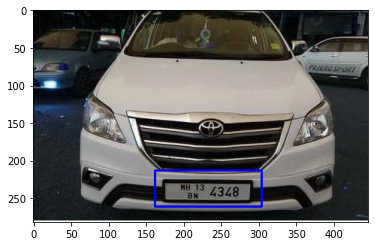

In [ ]:
image = plt.imread('rectangle.png')
plt.imshow(image)
plt.show()